In [1]:
import skeliner as sk

In [2]:
MESH_PATH = "../data/720575940545220339.ctm"
mesh = sk.io.load_mesh(MESH_PATH)

In [3]:
skel = sk.skeletonize(mesh, 
    detect_soma=True,
    # --- post-processing parameters ---
    collapse_soma=True, 
    bridge_gaps=True, 
    prune_tiny_neurites=True, 
    verbose=True,
)

[skeliner] starting skeletonisation (636,684 vertices, 1,274,227 faces)
 ↳  build surface graph                          … 3.73 s
 ↳  bin surface vertices by geodesic distance    … 2.68 s
 ↳  compute bin centroids and radii              … 3.84 s
 ↳  post-skeletonization soma detection          … 0.16 s
      └─ Found soma at [951105.4, 1089496.9, 33282.3]
      └─ (r =  7604.1, 4358.5, 2905.8)
 ↳  map mesh faces to skeleton edges             … 0.42 s
 ↳  merge redundant near-soma nodes              … 0.45 s
      └─ 68 nodes merged into soma
      └─ Moved soma to [951131.8, 1087994.8, 33686.8]
      └─ (r =  9015.2, 6155.3, 2758.3)
 ↳  bridge skeleton gaps                         … 0.15 s
 ↳  build global minimum-spanning tree           … 0.08 s
 ↳  prune tiny neurites                          … 0.54 s
      └─ Merged 55 peri-soma nodes into soma 
      └─ Moved soma to [951190.9, 1086471.2, 34106.4]
      └─ (r =  8441.2, 5798.7, 2761.2)
      └─ Merged 416 single-node branches (416 

(<Figure size 600x600 with 3 Axes>,
 {'B': <Axes: label='B', ylabel='z (µm)'>,
  'A': <Axes: label='A', xlabel='x (µm)', ylabel='y (µm)'>,
  'C': <Axes: label='C', xlabel='z (µm)'>})

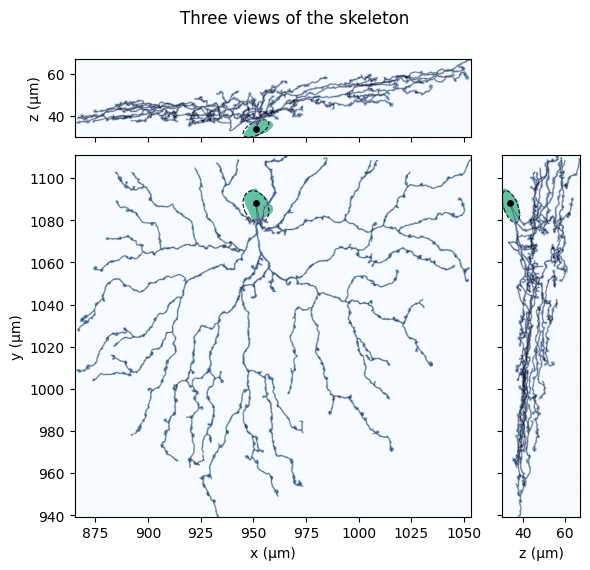

In [4]:
sk.plot3v(skel, mesh, scale=1e-3, unit="µm", planes=["xy", "xz", "zy"], 
          color_by="ntype", skel_cmap="Set2",
          title="Three views of the skeleton",
          figsize=(6, 6))

In [5]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-06-02 12:00:05CEST

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 9.2.0

skeliner: 0.1.2

Watermark: 2.5.0

